
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/worldcities/worldcities.csv
/kaggle/input/cost-of-living-2020/cost of living 2020.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')
living_price = pd.read_csv('/kaggle/input/cost-of-living-2020/cost of living 2020.csv')
towns = pd.read_csv('/kaggle/input/worldcities/worldcities.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
28670,id_5813,London,"['British', 'Gluten Free Options', 'Vegetarian...",5822.0,$$ - $$$,73.0,"[['Nice food and service', 'Breakfast'], ['10/...",/Restaurant_Review-g186338-d3628752-Reviews-Bo...,d3628752,1,4.5
41746,id_4305,Madrid,['Spanish'],4307.0,$,7.0,"[['Quick and Delicious'], ['04/21/2014']]",/Restaurant_Review-g187514-d1903962-Reviews-Ja...,d1903962,1,5.0
45016,id_272,Geneva,"['French', 'Swiss', 'European']",274.0,$$ - $$$,69.0,"[['Great Food and Service', 'Very good resto f...",/Restaurant_Review-g188057-d3626303-Reviews-Ch...,d3626303,1,4.5
14436,id_287,Munich,"['Cafe', 'European', 'Vegetarian Friendly', 'V...",289.0,$$ - $$$,38.0,"[['Excellent cafe, Unexpected gourmet Silvest....",/Restaurant_Review-g187309-d12334125-Reviews-R...,d12334125,1,4.5
41416,id_1242,London,"['Italian', 'Pizza', 'Vegetarian Friendly', 'V...",1244.0,$$ - $$$,266.0,"[['Nice zizzi with nice xmass decoration', 'go...",/Restaurant_Review-g186338-d1018970-Reviews-Zi...,d1018970,1,4.0


# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.

## Обработка признаков


In [14]:
# Для начала посмотрим на наши данные:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Видно, что в нашем датасете всего 10 столбцов, из которых 3 числовых и 7 текстовых. Встречаются пропущенные значения в столбцах Cuisine Style, Price Range и Number of Reviews. Чтобы наглядно оценить количество пропущенных значений, давайте посторим диаграмму.

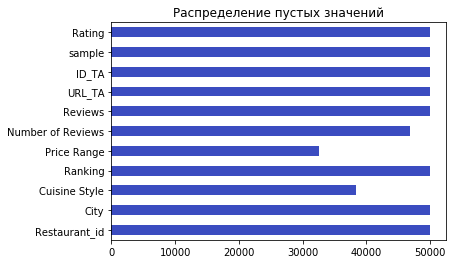

In [15]:
a = 50000 - data.isna().sum()
a.plot(kind = 'barh', colormap = 'coolwarm', title = 'Распределение пустых значений')

На диаграмме хорошо видно, что наибольшее количество пропусков в столбце Price Range. На втором месте идет столбец Cuisine Style. На третьем - Numbers of Reviews. Далее попробуем поработать с этими пропусками, но начнем с анализа столбцов по порядку их расположения. Возможно найдем, что-то интересное.

In [16]:
data.sample(3)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
34883,id_2500,London,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",2505.0,$$ - $$$,266.0,"[['Wonderful Lebanese Food', 'Super little res...",/Restaurant_Review-g186338-d2243845-Reviews-Me...,d2243845,1,4.5
25678,id_581,Prague,"['Italian', 'Mediterranean', 'European', 'Vege...",582.0,$$ - $$$,74.0,"[['Good soups', 'Delicious food and very frien...",/Restaurant_Review-g274707-d7736479-Reviews-La...,d7736479,1,4.5
6495,id_6495,Vienna,"['Austrian', 'Cafe', 'European', 'Wine Bar']",1544.0,NaN,6.0,"[[], []]",/Restaurant_Review-g190454-d7185814-Reviews-Zu...,d7185814,0,0.0


## 1. Проанализируем столбец Restaurant_id
Пропусков в этом столбце нет, но на всякий случай проверим на повторяющиеся значения.

In [17]:
data.Restaurant_id.value_counts().head(5)

id_227    19
id_871    19
id_633    19
id_436    19
id_534    18
Name: Restaurant_id, dtype: int64

В этом столбце имеются повторяющиеся идентификаторы ресторанов. Скорее всего это сетевые рестораны. Наверное, стоит создать новый признак rest_chain и присвоить сетевым ресторанам идентификатор 1, а несетевым - 0.

In [18]:
# Создадим список с ресторанами, у которых больше одного заведения:
rest_chain = list(data.Restaurant_id.value_counts()[data.Restaurant_id.value_counts() > 1].index)
# Добавим новый столбец в наш датафрейм:
data['rest_chain'] = data[data.Restaurant_id.isin(rest_chain)].Restaurant_id.apply(lambda x: 1)
# Присвоим ноль в этом столбце не сетевым ресторанам:
data['rest_chain'].fillna(0, inplace=True)
# Посмотрим сколько у нас сетевых и не сетевых рестранов:
data.rest_chain.value_counts()

1.0    46193
0.0     3807
Name: rest_chain, dtype: int64

Сетевых ресторанов оказалось значительно больше. Возможно, что сетевые рестораны больше заинтересованы во включении себя базу данных.

## 2. Проанализируем столбец City
Прпусков в данном столбце нет. Посмотрим на распределение ресторанов по городам.

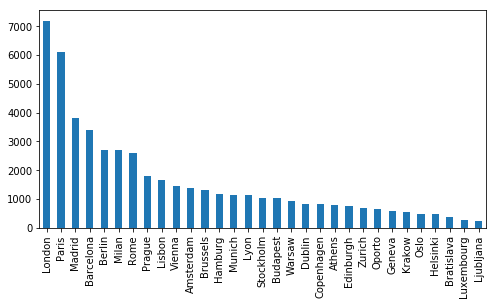

In [19]:
plt.figure(figsize=(8,4))
data.City.value_counts(ascending=False).plot(kind='bar');

Исправим название города Oporto на привычное Porto и поработаем с информацией в датасете по городам.

In [20]:
data.loc[data.City == 'Oporto', 'City'] = 'Porto'
city = data.City.unique()

In [21]:
data['ranked_cities'] = data['City'].rank()

In [22]:
towns = towns[(towns.city_ascii.isin(city)) &
                  (towns.country != 'United States') &
                  (towns.country != 'Canada') &
                  (towns.country != 'Venezuela')]

In [23]:
set(city) - set(towns.city_ascii) # проверяем все ли города нашли

set()

In [24]:
# Удалим ненужные колонки:
towns = towns.drop(['city', 'iso2', 'iso3', 'admin_name',  'id'], axis=1)

In [25]:
# Переведем в млн. человек:
towns['population']  = round((towns['population'] / 1000000), 2)

In [26]:
# Добавим признак "столица":
towns.capital.fillna('primary', inplace=True)

In [27]:
towns['capital'] = towns.capital.apply(lambda x: 1 if x == 'primary' else 0)

Больше всего ресторанов в Париже и Лондоне. Потом добавим сюда датасет с информацией по городам и посмотрим, что произойдет. Может парочку признаков удасться оттуда вытащить.
Еще можно создать признак города. Всего 31 город, можно каждому городу присвоить пятибитное значение от 00000 до 11111.

In [28]:
city_dict = {'London': 11111,
              'Paris': 11110,
              'Madrid': 11101,
              'Barcelona': 11100,
              'Berlin': 11011,
              'Milan': 11010,
              'Rome': 11001,
              'Prague': 11000,
              'Lisbon': 11101,
              'Vienna': 10111,
              'Amsterdam': 10110,
              'Brussels': 10101,
              'Hamburg': 10100,
              'Munich': 10011,
              'Lyon': 10010,
              'Stockholm': 10001,
              'Budapest': 10000,
              'Warsaw': 1111,
              'Dublin': 1110,
              'Copenhagen': 1101,
              'Athens': 1100,
              'Edinburgh': 1011,
              'Zurich': 1010,
              'Oporto': 1001,
              'Geneva': 1000,
              'Krakow': 111,
              'Oslo': 110,
              'Helsinki': 101,
              'Bratislava': 100,
              'Luxembourg': 11,
              'Ljubljana': 10,
             }
data['city_id'] = data['City'].map(city_dict)

In [29]:
# На всякий случай создадим новую колонку, в которой будут хранится названия городов.
data['City_name'] = data['City']

Проанализируем датасет уровня жизни:

In [30]:
country_lst = towns['country'].tolist()

In [31]:
living_price.head(3)

,Rank 2020,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,McMeal($),Unnamed: 9
0,1,Bermuda,147.77,85.70,117.54,146.63,152.52,78.17,0.00,NaN
1,2,Switzerland,125.69,51.20,89.41,124.93,118.55,114.83,15.36,NaN
2,3,Norway,96.80,32.61,65.54,89.55,96.81,83.40,12.36,NaN


In [32]:
living_price.loc[living_price.Country.str.contains('Czec'), 'Country'] = 'Czechia'
living_price = living_price[living_price.Country.isin(country_lst)]

In [33]:
set(country_lst) - set(living_price.Country)

set()

In [34]:
# Удалим странный столбец:
living_price.drop('Unnamed: 9', axis=1, inplace=True)

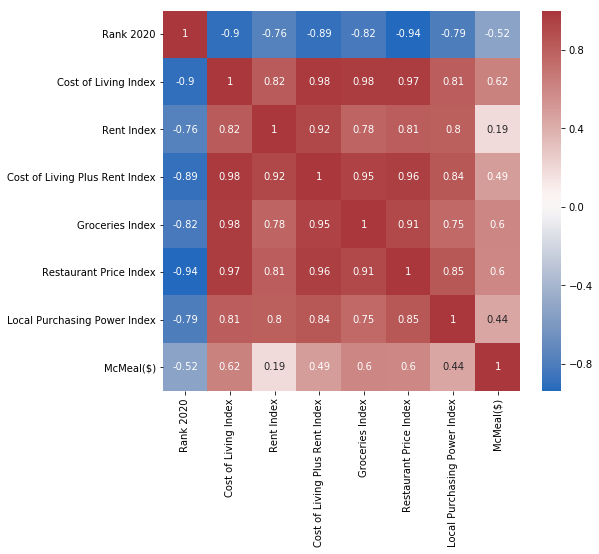

In [35]:
# Проведем корреляционный анализ:
plt.figure(figsize=(8,7))
sns.heatmap(living_price.corr(), annot=True, cmap='vlag');

Выберем несколько признаков, которые могут улучшить модель:

In [36]:
living_price.columns

Index(['Rank 2020', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'McMeal($)'],
      dtype='object')

In [37]:
living_price.drop(['Rent Index', 'Cost of Living Plus Rent Index',
           'Groceries Index', 'Local Purchasing Power Index' ], axis=1, inplace=True)

Объединим датасеты в один:

In [38]:
towns = towns.join(living_price.set_index('Country'), on='country')

In [39]:
data = data.join(towns.set_index('city_ascii'), on='City')

In [40]:
# Создадим признак количество ресторанов в городе.
city_counts_dict = dict(data['City_name'].value_counts())

In [41]:
data['rest_counts'] = data.City.map(city_counts_dict)

Добавим dummy variables, фиктивные признаки, как рекомендуют в baseline:

In [42]:
data = pd.get_dummies(data, columns=['City_name'], dummy_na=True)

## 3. Проанализируем столбец Cuisine Style
Пропусков тут довольно много. Как лучше заполнить эти пропуски? Сначала посмотрим сколько и различных кухонь представлено. Учитываем, что у одного ресторана может быть сразу несколько кухонь.

In [43]:
# Создадим признак отсуствия информации о кухне:
data['Cuisine Style_NAN'] = data['Cuisine Style'].isna().astype('uint8')

In [44]:
# Пропуски заполним значением Other
data['Cuisine Style'].fillna("['Other']",inplace=True)
# Превратим значения в столбце в списки:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: eval(x))
# Найдем уникальные значения:
s = data['Cuisine Style'].explode()
pd.Series(s).value_counts()

Vegetarian Friendly    14021
European               12561
Other                  11590
Mediterranean           7820
Italian                 7433
                       ...  
Yunnan                     2
Salvadoran                 1
Xinjiang                   1
Burmese                    1
Latvian                    1
Name: Cuisine Style, Length: 126, dtype: int64

Без учета пропусков, которые заполнены Other, имеем 125 разных кухонь. Самое большое количество ресторанов с кухнями Vegetarian Friendly и European. Возможно, стоит проанализировать в каких ресторанах чаще встречается European или Vegetarian Friendly и затем найти признак, по которому их можно будет распределить вместо признака Other. Также можно этим ресторанам проставить европейскую кухню и вегетарианскую - два самых частых значения.
Какой числовой признак можно выделить из этого столбика? Например, количество кухонь в одном ресторане.

In [45]:
data['cuisine_count'] = data['Cuisine Style'].apply(lambda x: len(x))

Посмотрим частоту встречаемости кухонь и выберем редкие (< 50)

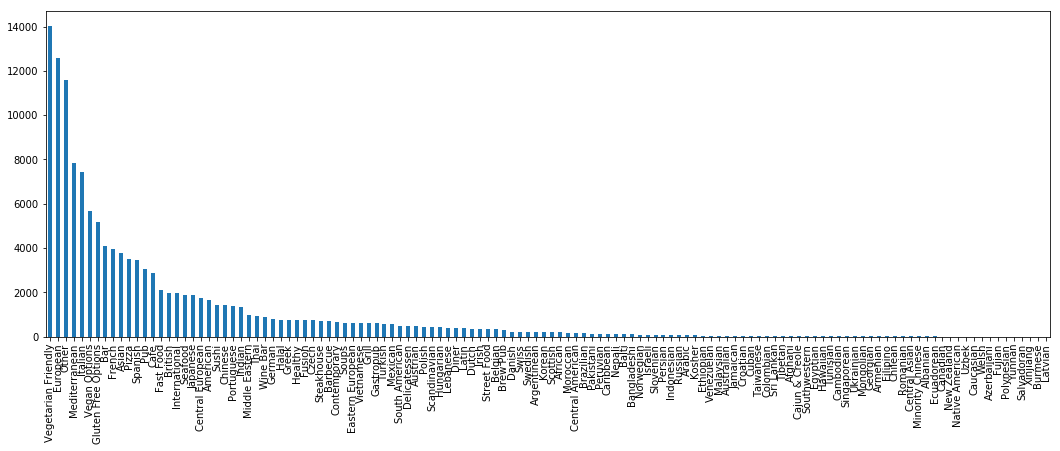

In [46]:
plt.figure(figsize=(18,6))
data.explode('Cuisine Style')['Cuisine Style'].value_counts(ascending=False).plot(kind='bar');

Кухонь "vegetarian friendly" и "european" больше всего. Кухни, которые встречаются меньше 50 раз - редкие кухни.

In [47]:
cuisine_rare_lst = data.explode('Cuisine Style')['Cuisine Style'].value_counts()[
    data.explode('Cuisine Style')['Cuisine Style'].value_counts() < 50].index.tolist()

In [48]:
def cuisine_rare_count(cell):
    '''Количество редких кухонь в ресторане'''
    x = 0
    for i in cuisine_rare_lst:
        if i in cell:
            x += 1
    return x

In [49]:
data['cuisine_rare'] = data['Cuisine Style'].apply(cuisine_rare_count)

Создадим dummy переменные кухонь

In [50]:
cuisine_lst = list(data.explode('Cuisine Style')['Cuisine Style'].unique())

In [51]:
def find_item(cell):
    if item in cell:
        return 1
    return 0
    
for item in cuisine_lst:
    data[item] = data['Cuisine Style'].apply(find_item)

## 4. Проанализируем столбец Ranking
Место, которое занимает данный ресторан среди всех ресторанов своего города. Будем проверять, когда загрузим информацию по городам.

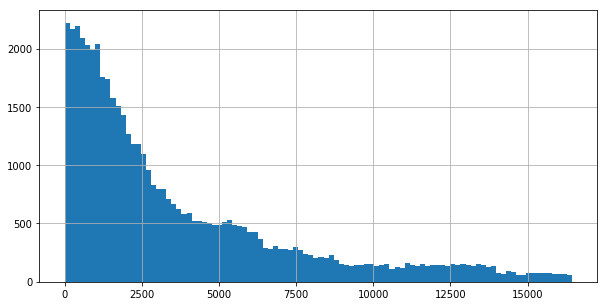

In [52]:
plt.rcParams['figure.figsize'] = (10,5)
data['Ranking'].hist(bins=100);

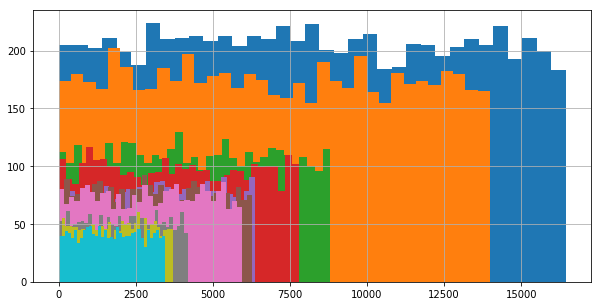

In [53]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=35)

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за этого мы имеем смещение. Разделим Ranking на количество ресторанов в городе.

In [54]:
data['ranking_norm'] = data.Ranking / data.rest_counts

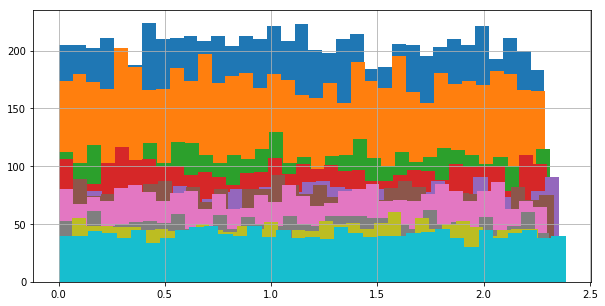

In [55]:
for x in (data['City'].value_counts())[0:10].index:
    data['ranking_norm'][data['City'] == x].hist(bins=35)

## 5. Проанализируем столбец Rating
Рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель). С этим признаком ничего не нужно делать.

## 6. Проанализируем столбец Price Range

In [56]:
# Присвоим новому признаку значение отсутствия информации о ценовом диапазоне:
data['Price Range_NAN'] = data['Price Range'].isna().astype('uint8')

In [57]:
# Присвоим отсутствующим значениям средний ценовой диапазон:
data['Price Range'].fillna('$$ - $$$', inplace=True)

In [58]:
# Создадим признак ценового диапазона:
price_dict = {'$': 1,
              '$$ - $$$': 2,
              '$$$$': 3,
             }
data['Price Range'] = data['Price Range'].map(price_dict)

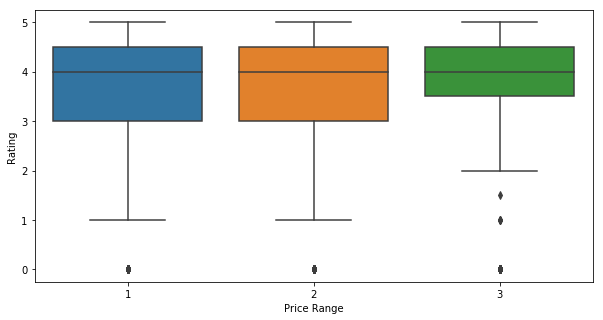

In [59]:
sns.boxplot(x='Price Range', y='Rating', data=data);

Самые дорогие рестораны реже получают низкие оценки.

## 7. Проанализируем столбец Reviews

In [60]:
# Когда был оставлен самый свежий отзыв?
data['Reviews'] = data.Reviews.dropna().apply(lambda x: eval(x.replace('nan', '').replace('[,', "['',")))
data['Reviews'] = data.Reviews.dropna().apply(lambda x: np.nan if len(x[0]) == 0 & len(x[1]) == 0 else x)

# Создадим новые признаки, date и date_1, date_2
data['date'] = data['Reviews'].dropna().apply(lambda x: x[1]) # Присвоили второе значение

# Если в date имеется два значения, то присваивается второе значение, или никакое.
data['date_1'] = data['date'].dropna().apply(lambda x: x[1] if len(x) == 2 else np.nan)
# Если в date значений больше нуля, то присваивается первое значение, или никакое.
data['date_2'] = data['date'].dropna().apply(lambda x: x[0] if len(x) > 0 else np.nan)

# Найдем количество дней между отзывами.
data['date_1'] = pd.to_datetime(data['date_1'])
data['date_2'] = pd.to_datetime(data['date_2'])
data['review_days'] = abs(data['date_2'] - data['date_1']).dt.days

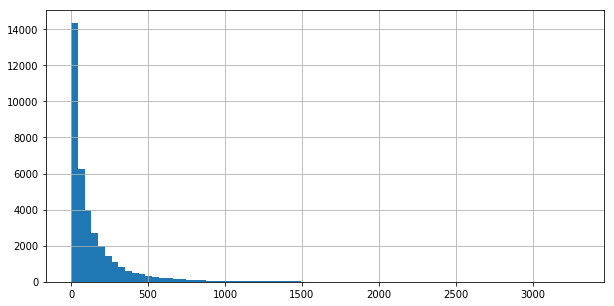

In [61]:
plt.figure(figsize=(10,5))
data['review_days'].hist(bins=75);

In [62]:
data['days_to_today'] = (datetime.now() - data['date_2']).dt.days
data['days_to_today']

0           NaN
1        1163.0
2        1140.0
3        1162.0
4        1098.0
          ...  
49995    1152.0
49996    1147.0
49997    1560.0
49998    1310.0
49999    1837.0
Name: days_to_today, Length: 50000, dtype: float64

Создадим признак количества последних коментариев

In [63]:
data['Reviews'] = data['Reviews'].dropna().apply(lambda x: x[0])

In [64]:
data['last_rewiew_counts'] = data['Reviews'].dropna().apply(
    lambda x: 2 if len(x) == 2 else 1 if len(x) == 1 else 0)

In [65]:
data.last_rewiew_counts.fillna(0, inplace=True)

In [66]:
def len_rewiews(cell):
    x = 0
    for i in cell:
        x += len(i)
    return x

In [67]:
data['len_rewiews'] = data['Reviews'].dropna().apply(len_rewiews)
data['len_rewiews'].fillna(0, inplace=True)

## 8. Проанализируем столбец Number of Reviews

Дальше проанализируем данные в колонке Number of Reviews:

In [68]:
data[data['Number of Reviews'].isna()][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
7,NaN,0.0
25,NaN,0.0
53,NaN,0.0
74,NaN,1.0
81,NaN,0.0


In [69]:
# Создадим признак отсутствия отзывов
data['Number of Reviews_NAN'] = data['Number of Reviews'].isna().astype('uint8')

In [70]:
data['Number of Reviews'].isna().sum()

3200

In [71]:
data.loc[(data['last_rewiew_counts'] == 0) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 0
data.loc[(data['last_rewiew_counts'] == 1) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 1

In [72]:
data['Number of Reviews'].isna().sum()

0

In [73]:
data[data['last_rewiew_counts'] ==0][['Number of Reviews', 'last_rewiew_counts']].head()

,Number of Reviews,last_rewiew_counts
0,4.0,0.0
6,2.0,0.0
7,0.0,0.0
18,2.0,0.0
20,8.0,0.0


У нас есть значения последних отзывов равные 0, хотя общее количество отзывов > 0. Это значит, что отзывы оставляли пустые.

Создадим словарь количество отзывов по городам и подставим в датасет

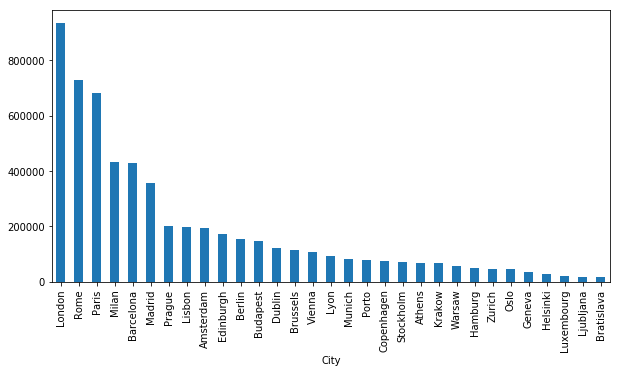

In [74]:
data.groupby('City')['Number of Reviews'].sum().sort_values(ascending=False).plot(kind='bar');

In [75]:
rewiews_city_dict = dict(data.groupby('City')['Number of Reviews'].sum())

In [76]:
data['num_rewiews_city'] = data.City.map(rewiews_city_dict)

Создадим признак отношения рейтинга в городе к количеству отзывов в городе.

In [77]:
data['relative_rank_reviews'] = data['Ranking'] / data['num_rewiews_city']

## 9. Проанализируем столбец ID_TA

In [78]:
data['ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

## Удалим столбцы, с которыми работать не умеем

In [79]:
data.drop(['URL_TA'], axis=1, inplace=True)

Удалим нечисловые признаки, которые ухудшали модель

In [80]:
data = data.select_dtypes(exclude='O').drop(['date_1', 'date_2',
                                             'len_rewiews',
                                             'capital', 'Ranking',
                                             'rest_chain', 'McMeal($)', 
                                             'Cost of Living Index', 
                                             'Restaurant Price Index',
                                             'last_rewiew_counts','City_name_nan',
                                            'review_days','days_to_today','ID_TA','city_id'], axis=1)

In [81]:
data.isna().sum()

Price Range              0
Number of Reviews        0
sample                   0
Rating                   0
ranked_cities            0
                        ..
ranking_norm             0
Price Range_NAN          0
Number of Reviews_NAN    0
num_rewiews_city         0
relative_rank_reviews    0
Length: 175, dtype: int64

# EDA 
Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение целевой переменной

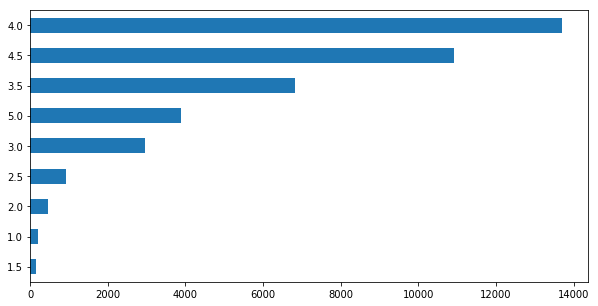

In [82]:
plt.figure(figsize=(10, 5))
df_train['Rating'].value_counts(ascending=True).plot(kind='barh');

### Посмотрим распределение целевой переменной относительно признака ranking_norm

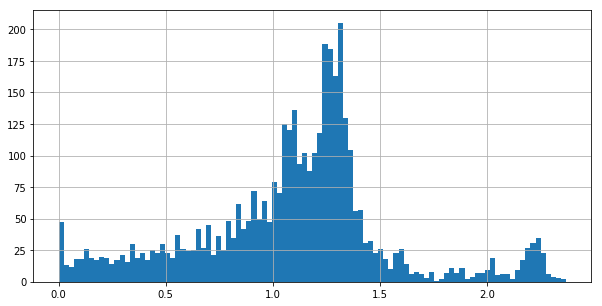

In [83]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] == 5].hist(bins=100);

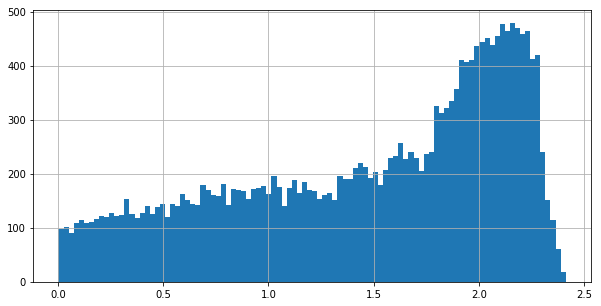

In [84]:
plt.figure(figsize=(10, 5))
data['ranking_norm'][data['Rating'] < 4].hist(bins=100);

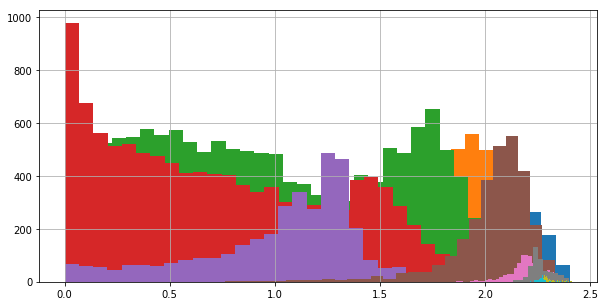

In [85]:
for x in data.Rating.unique():
    data['ranking_norm'][data['Rating'] == x].hist(bins=35)

### Корреляция признаков

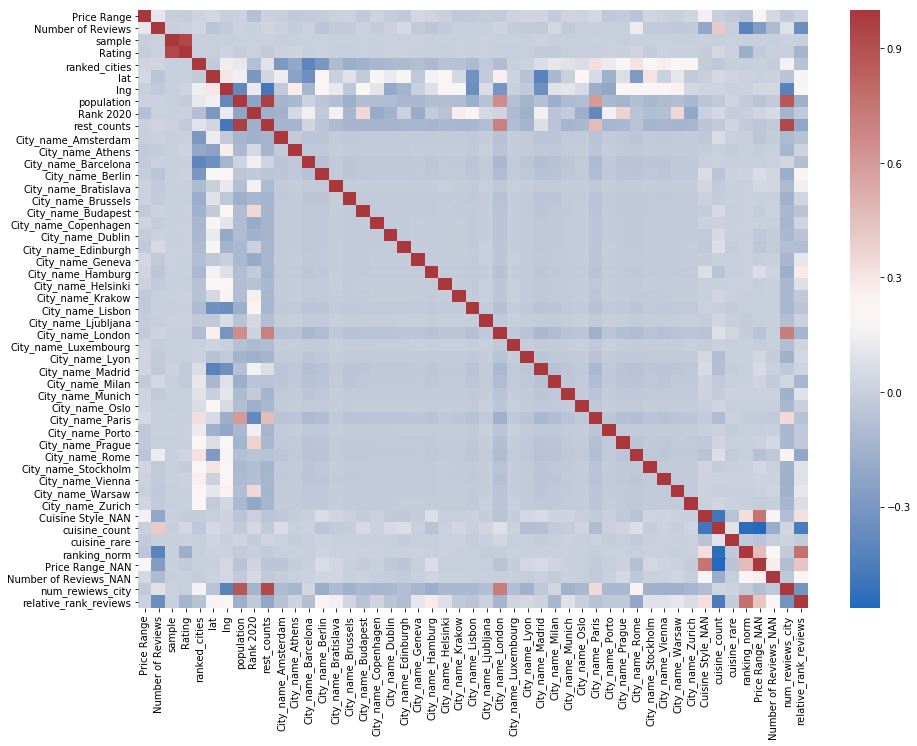

In [86]:
plt.rcParams['figure.figsize'] = (15,11)
sns.heatmap(data.drop(cuisine_lst, axis=1).corr(), cmap='vlag');

In [87]:
data.drop(cuisine_lst, axis=1).corr().Rating.sort_values(ascending=False).to_frame()# dummy кухонь не включал

,Rating
Rating,1.000000
sample,0.936543
cuisine_count,0.034506
City_name_Rome,0.027527
City_name_Athens,0.016852
lng,0.016663
City_name_Berlin,0.012834
Number of Reviews,0.011011
City_name_Vienna,0.010188
City_name_Porto,0.009654


# Data Preprocessing

In [88]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [89]:
# Воспользуемся специальной функцией train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [90]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 174), (40000, 174), (40000, 173), (32000, 173), (8000, 173))

# Model 
Сам ML

In [91]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [92]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [93]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=1,
                      warm_start=False)

In [94]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [95]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20285187500000001


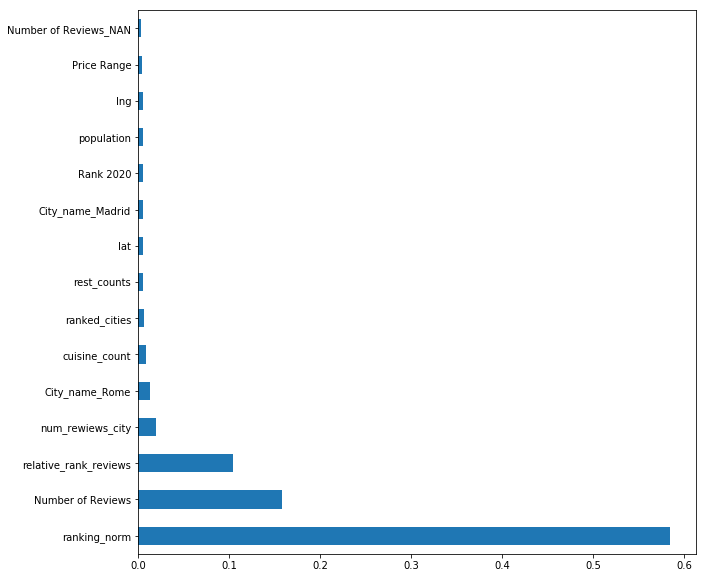

In [96]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [97]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,ranked_cities,lat,lng,population,Rank 2020,rest_counts,City_name_Amsterdam,...,Salvadoran,Xinjiang,Burmese,Fujian,Latvian,ranking_norm,Price Range_NAN,Number of Reviews_NAN,num_rewiews_city,relative_rank_reviews
701,1,87.0,0.0,3846.0,41.3825,2.1769,4.59,42,3395,0,...,0,0,0,0,0,1.008542,0,0,429490.0,0.007972
1887,2,1013.0,0.0,44620.0,41.8931,12.4828,2.87,28,2589,0,...,0,0,0,0,0,0.157204,1,0,728250.0,0.000559
227,2,23.0,0.0,28526.0,40.4189,-3.6919,3.27,42,3813,0,...,0,0,0,0,0,0.841332,1,0,357202.0,0.008981
4693,2,128.0,0.0,16992.0,38.7452,-9.1604,0.51,56,1647,0,...,0,0,0,0,0,2.147541,0,0,196385.0,0.018011
7657,2,20.0,0.0,28526.0,40.4189,-3.6919,3.27,42,3813,0,...,0,0,0,0,0,1.676108,1,0,357202.0,0.017892
6933,2,1.0,0.0,21634.0,51.5072,-0.1275,10.98,33,7193,0,...,0,0,0,0,0,2.044349,0,1,934144.0,0.015742
2283,2,67.0,0.0,31779.5,45.4669,9.1900,1.35,28,2694,0,...,0,0,0,0,0,2.276169,1,0,431359.0,0.014216
511,2,1.0,0.0,10453.0,47.4983,19.0408,1.75,76,1021,0,...,0,0,0,0,0,1.873653,1,1,148404.0,0.012890
1833,1,263.0,0.0,21634.0,51.5072,-0.1275,10.98,33,7193,0,...,0,0,0,0,0,0.740859,0,0,934144.0,0.005705
3287,2,18.0,0.0,9285.5,50.8467,4.3517,0.19,19,1314,0,...,0,0,0,0,0,1.156773,0,0,113983.0,0.013335


In [98]:
test_data = test_data.drop(['Rating'], axis=1)

In [99]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [100]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [101]:
predict_submission

array([3.04 , 4.23 , 4.525, ..., 3.02 , 4.5  , 4.27 ])

In [102]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.040
1,id_1,4.230
2,id_2,4.525
3,id_3,4.275
4,id_4,4.350
5,id_5,4.620
6,id_6,2.215
7,id_7,2.650
8,id_8,4.070
9,id_9,4.750


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
